Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fold 1 - Accuracy: 80.67%
Fold 1 - Sensitivity: 81.40%
Fold 1 - Specificity: 80.26%
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        76
           1       0.70      0.81      0.75        43

    accuracy                           0.81       119
   macro avg       0.79      0.81      0.80       119
weighted avg       0.82      0.81      0.81       119

Fold 2 - Accuracy: 83.19%
Fold 2 - Sensitivity: 85.37%
Fold 2 - Specificity: 82.05%
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        78
           1       0.71      0.85      0.78        41

    accuracy                           0.83       119
   macro avg       0.81      0.84      0.82       119
weighted avg       0.85      0.83      0.83       119

Fold 3 - Accuracy: 73.11%
Fold 3 - Sensitivity: 6

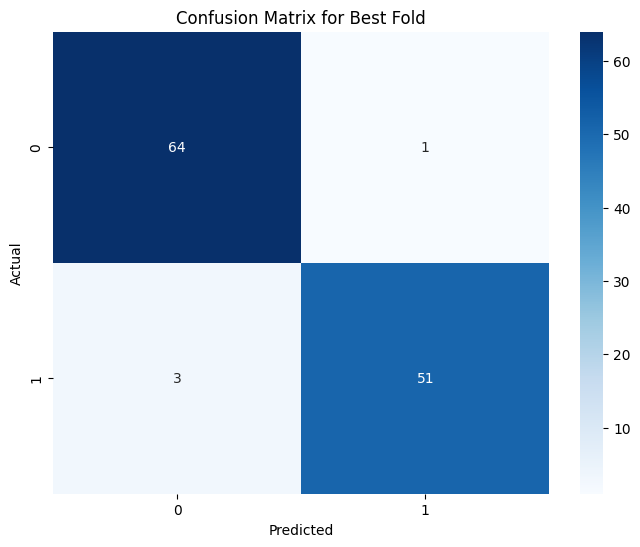

Fold 1 - Training Time: 0.29 seconds
Fold 2 - Training Time: 0.10 seconds
Fold 3 - Training Time: 0.15 seconds
Fold 4 - Training Time: 0.10 seconds
Fold 5 - Training Time: 0.16 seconds
Fold 6 - Training Time: 0.07 seconds
Fold 7 - Training Time: 0.08 seconds
Fold 8 - Training Time: 0.29 seconds
Fold 9 - Training Time: 0.10 seconds
Fold 10 - Training Time: 0.10 seconds


In [5]:
!pip install hpelm
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import hpelm
import matplotlib.pyplot as plt
import seaborn as sns
import time  # Import time module untuk mengukur waktu

# Memuat dataset
from google.colab import drive
drive.mount('/content/drive')
df = '/content/drive/MyDrive/heart-disease-dataset.csv'
data = pd.read_csv(df)

# Pisahkan fitur dan label
X = data.drop(columns=['target'])  # Sesuaikan 'target' dengan nama kolom label Anda
y = data['target']

# Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encoding untuk label
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

np.random.seed(42)

# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=False)
confusion_matrices = []
accuracies = []
sensitivities = []
specificities = []
training_times = []  # List to store training times for each fold

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Mulai menghitung waktu training
    start_time = time.time()

    # ELM model
    elm_model = hpelm.ELM(X_train.shape[1], y_train.shape[1], classification="c", w=None)
    elm_model.add_neurons(450, 'tanh')  # Anda bisa menyesuaikan jumlah neuron dan fungsi aktivasi
    elm_model.train(X_train, y_train)

    # Waktu selesai training
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)  # Simpan waktu training untuk fold ini

    # Prediksi
    y_pred = elm_model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Evaluasi dengan confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    confusion_matrices.append(cm)

    # Hitung akurasi
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    accuracies.append(accuracy)

    # Hitung sensitivitas dan spesifisitas
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    sensitivity = TP / (TP + FN) * 100
    specificity = TN / (TN + FP) * 100
    sensitivities.append(sensitivity)
    specificities.append(specificity)

    print(f"Fold {i+1} - Accuracy: {accuracy * 100:.2f}%")
    print(f"Fold {i+1} - Sensitivity: {sensitivity:.2f}%")
    print(f"Fold {i+1} - Specificity: {specificity:.2f}%")
    print(classification_report(y_test_classes, y_pred_classes))

# Hitung rata-rata hasil
mean_accuracy = np.mean(accuracies) * 100
mean_sensitivity = np.mean(sensitivities)
mean_specificity = np.mean(specificities)
mean_training_time = np.mean(training_times)

# Tampilkan rata-rata hasil
print(f"\nAverage Accuracy: {mean_accuracy:.2f}%")
print(f"Average Sensitivity: {mean_sensitivity:.2f}%")
print(f"Average Specificity: {mean_specificity:.2f}%")
print(f"Average Training Time: {mean_training_time:.2f} seconds")

# Rata-rata confusion matrix
average_cm = np.mean(confusion_matrices, axis=0)
print("\nAverage Confusion Matrix:\n", average_cm)

# Cari fold terbaik
best_fold = np.argmax(accuracies)
print(f"\nBest Fold: {best_fold + 1}")
print(f"Accuracy on Best Fold: {accuracies[best_fold] * 100:.2f}%")
print(f"Confusion Matrix on Best Fold:\n{confusion_matrices[best_fold]}")

# Tampilkan confusion matrix untuk fold terbaik
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrices[best_fold], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best Fold')
plt.show()

# Tampilkan waktu training untuk setiap fold
for i, training_time in enumerate(training_times):
    print(f"Fold {i+1} - Training Time: {training_time:.2f} seconds")


In [6]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   float64
 1   sex                  1190 non-null   float64
 2   chest_pain_type      1190 non-null   float64
 3   resting_bp_s         1190 non-null   float64
 4   cholesterol          1190 non-null   float64
 5   fasting_blood_sugar  1190 non-null   float64
 6   resting_ecg          1190 non-null   float64
 7   max_heart_rate       1190 non-null   float64
 8   exercise_angina      1190 non-null   float64
 9   oldpeak              1190 non-null   float64
 10  st_slope             1190 non-null   float64
 11  target               1190 non-null   float64
dtypes: float64(12)
memory usage: 111.7 KB
None
    age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0  40.0  1.0              2.0         140.0        289.0        

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import hpelm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import ipywidgets as widgets
from IPython.display import display, HTML

# Custom CSS untuk tampilan mewah
display(HTML('''
    <style>
        .widget-input {
            background-color: #f4f4f9;
            border-radius: 10px;
            padding: 10px;
            box-shadow: 0 4px 8px rgba(0,0,0,0.1);
            margin-bottom: 10px;
            font-size: 16px;
        }
        .widget-dropdown, .widget-text, .widget-inttext, .widget-floattext {
            background-color: white;
            border: 2px solid #e0e0e0;
            border-radius: 5px;
            padding: 5px;
            font-size: 15px;
            width: 280px;
            transition: all 0.3s ease;
        }
        .widget-dropdown:hover, .widget-text:hover, .widget-inttext:hover, .widget-floattext:hover {
            border-color: #dab76a;
        }
        .widget-button {
            background-color: #4CAF50;
            color: white;
            border-radius: 8px;
            padding: 10px 20px;
            font-weight: bold;
            font-size: 16px;
            border: none;
            box-shadow: 0 4px 8px rgba(0,0,0,0.1);
            cursor: pointer;
            transition: background-color 0.3s ease;
        }
        .widget-button:hover {
            background-color: #45a049;
        }
        .result-box {
            border-radius: 10px;
            padding: 15px;
            margin-top: 10px;
            background-color: #f9f9f9;
            box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);
            color: #333;
        }
    </style>
'''))

# Membuat widget input dengan layout mewah
age = widgets.IntText(description='Age:', layout=widgets.Layout(width='300px'), style={'description_width': 'initial'})
sex = widgets.Dropdown(options=[('Perempuan', 0), ('Laki-laki', 1)], description='Sex:', layout=widgets.Layout(width='300px'), style={'description_width': 'initial'})
cp = widgets.Dropdown(options=[('Typical angina', 0), ('Atypical angina', 1), ('Non-anginal pain', 2), ('Asymptomatic', 3)], description='Chest Pain:', layout=widgets.Layout(width='300px'), style={'description_width': 'initial'})
trestbps = widgets.IntText(description='Resting BP:', layout=widgets.Layout(width='300px'), style={'description_width': 'initial'})
chol = widgets.IntText(description='Cholesterol:', layout=widgets.Layout(width='300px'), style={'description_width': 'initial'})
fbs = widgets.Dropdown(options=[('Tidak', 0), ('Ya', 1)], description='Fasting BS:', layout=widgets.Layout(width='300px'), style={'description_width': 'initial'})
restecg = widgets.Dropdown(options=[('Normal', 0), ('ST-T wave abnormality', 1), ('Left ventricular hypertrophy', 2)], description='Resting ECG:', layout=widgets.Layout(width='300px'), style={'description_width': 'initial'})
thalach = widgets.IntText(description='Max Heart Rate:', layout=widgets.Layout(width='300px'), style={'description_width': 'initial'})
exang = widgets.Dropdown(options=[('Tidak', 0), ('Ya', 1)], description='Exercise Angina:', layout=widgets.Layout(width='300px'), style={'description_width': 'initial'})
oldpeak = widgets.FloatText(description='Oldpeak:', layout=widgets.Layout(width='300px'), style={'description_width': 'initial'})
slope = widgets.Dropdown(options=[('Upsloping', 0), ('Flat', 1), ('Downsloping', 2)], description='Slope:', layout=widgets.Layout(width='300px'), style={'description_width': 'initial'})

# Menata layout input menggunakan grid box
input_box = widgets.VBox([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope])

# Fungsi untuk menangani prediksi dan menampilkan hasil
def predict_and_display(button):
    # Mengumpulkan nilai input dari widget
    input_data = np.array([
        age.value, sex.value, cp.value, trestbps.value, chol.value,
        fbs.value, restecg.value, thalach.value, exang.value,
        oldpeak.value, slope.value
    ]).reshape(1, -1)

    # Normalisasi data input
    input_data_scaled = scaler.transform(input_data)

    # Prediksi menggunakan model ELM
    prediction = elm_model.predict(input_data_scaled)

    # Mengambil kelas prediksi
    predicted_class = np.argmax(prediction)

    # Menampilkan hasil prediksi dan nilai input
    prediction_text = "Normal" if predicted_class == 0 else "Terindikasi Penyakit Jantung"

    # Membuat teks deskriptif untuk nilai input
    input_text = f"Age: {age.value}, Sex: {sex.label}, Chest Pain: {cp.label}, Resting BP: {trestbps.value}, Cholesterol: {chol.value}, " \
                 f"Fasting BS: {fbs.label}, Resting ECG: {restecg.label}, Max Heart Rate: {thalach.value}, " \
                 f"Exercise Angina: {exang.label}, Oldpeak: {oldpeak.value}, Slope: {slope.label}"

    # Menampilkan hasil prediksi dan nilai input menggunakan widget
    result_label = widgets.Label(value=f"Prediction: {prediction_text}")
    input_values_label = widgets.Label(value=f"Input Values: {input_text}")

    # Tampilan hasil dalam satu box dengan gaya mewah
    result_box = widgets.VBox([result_label, input_values_label], layout=widgets.Layout(padding='10px', border='solid 1px gray', border_radius='10px'))
    display(result_box)

# Membuat tombol prediksi dengan desain mewah
predict_button = widgets.Button(
    description="Predict",
    layout=widgets.Layout(width='300px', height='40px')
)

# Mengaitkan tombol prediksi dengan fungsi predict_and_display
predict_button.on_click(predict_and_display)

# Menampilkan widget input dan tombol prediksi
display(input_box, predict_button)


Button(description='Predict', layout=Layout(height='40px', width='300px'), style=ButtonStyle())